In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Warehouse_and_Retail_Sales.csv.zip')
df



,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
307640,2020,9,BOSTON BEER CORPORATION,98868,SAM ADAMS OCTOBERFEST 1/6K,KEGS,0.00,0.0,54.0
307641,2020,9,GLOBAL OCEAN AND AIR CARGO SERVICES,98884,HARAR BEER 4/6NR - 11.2OZ,BEER,1.50,1.0,8.0
307642,2020,9,HEINEKEN USA,98906,DOS EQUIS LAGER 1/2K,KEGS,0.00,0.0,22.0
307643,2020,9,RELIABLE CHURCHILL LLLP,98914,LINDEMANS KRIEK NR - 25.4OZ,BEER,0.00,0.0,4.0


In [24]:
df.shape

(307645, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [26]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [27]:
new=df.dropna()
new.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [28]:
new.shape

(307477, 9)

In [29]:
new.duplicated().sum()

np.int64(0)

In [30]:
new.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [31]:
median=new['RETAIL SALES'].median()
median

0.32

In [32]:
mode=new['RETAIL SALES'].mode()[0]
mode

np.float64(0.0)

In [33]:
median_warehouse=new['WAREHOUSE SALES'].median()
median_warehouse

1.0

In [34]:
mode_warehouse=new['WAREHOUSE SALES'].mode()[0]
mode_warehouse

np.float64(0.0)

In [35]:
#time series analysis of monthly sales of retail
monthly_sales=new.groupby('MONTH')['RETAIL SALES'].sum()
monthly_sales

,RETAIL SALES
MONTH,
1,225603.05
2,157898.62
3,193225.27
4,80320.72
5,94921.74
6,188178.90
7,275122.61
8,177715.36
9,253181.99


In [36]:
#PRODUCT ANALYSIS
new.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(20)


,RETAIL SALES
ITEM DESCRIPTION,
TITO'S HANDMADE VODKA - 1.75L,27580.50
CORONA EXTRA LOOSE NR - 12OZ,25064.00
HEINEKEN LOOSE NR - 12OZ,17761.00
MILLER LITE 30PK CAN - 12OZ,14440.00
BUD LIGHT 30PK CAN,12299.00
BOWMAN'S VODKA - 1.75L,12126.72
MILLER LITE HIGH GRAPHIC LOOSE NR - 12OZ,10373.77
STELLA ARTOIS LOOSE NR - 11.2OZ,10354.00
CORONA EXTRA 2/12 NR - 12OZ,9755.19


In [37]:
new.groupby('ITEM TYPE')['MONTH'].sum().plot(kind='bar')
plt.title("Sales by Item Type")
plt.ylabel("MONTH")
plt.xlabel("Item Type") # Removed incorrect labelpad and used a more appropriate label
plt.show()

TypeError: unsupported operand type(s) for *: 'type' and 'float'

<Figure size 640x480 with 1 Axes>

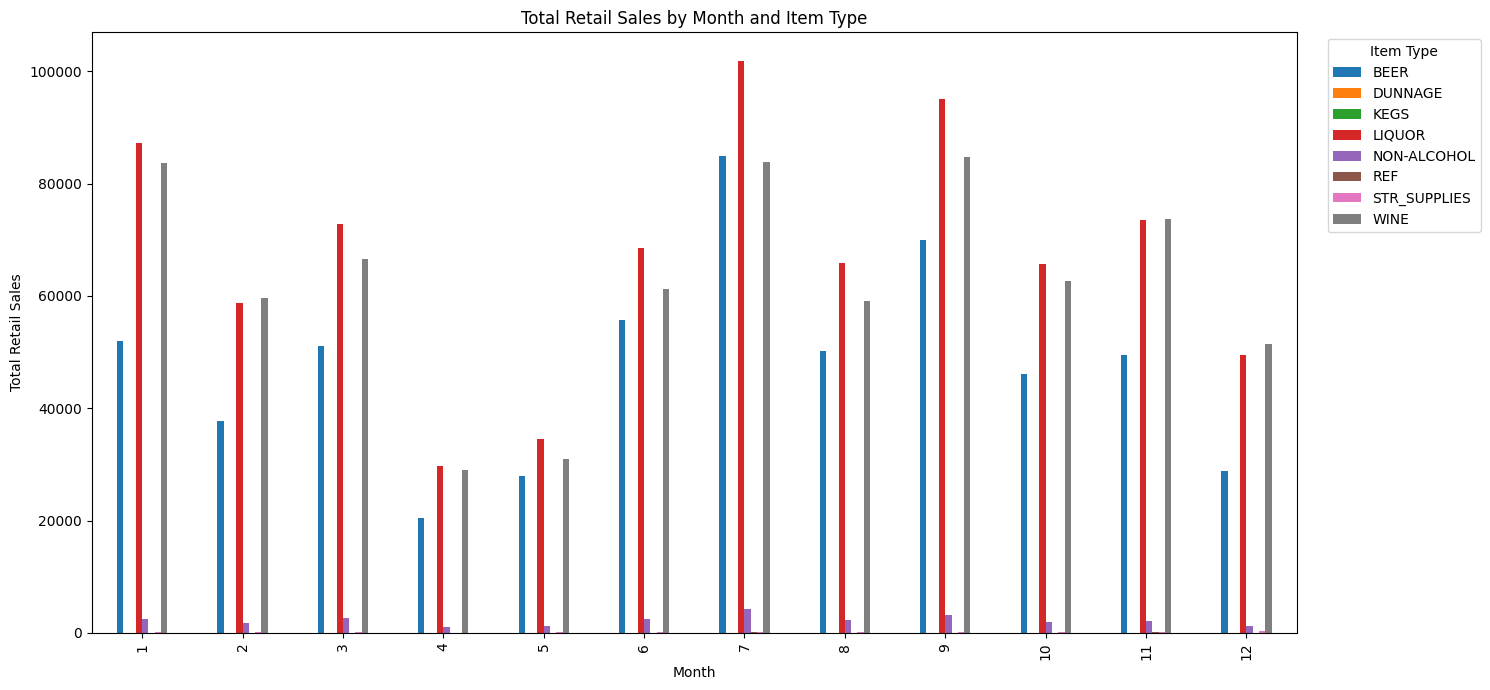

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'df' is loaded if not already in the kernel state
if 'df' not in locals():
    df = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv.zip')

# Ensure 'new' DataFrame is available (cleaned data)
if 'new' not in locals():
    new = df.dropna()

# Group by MONTH and ITEM TYPE, then sum RETAIL SALES
monthly_item_sales = new.groupby(['MONTH', 'ITEM TYPE'])['RETAIL SALES'].sum().unstack()

# Plotting the results
monthly_item_sales.plot(kind='bar', figsize=(15, 7))
plt.title("Total Retail Sales by Month and Item Type")
plt.xlabel("Month")
plt.ylabel("Total Retail Sales")
plt.legend(title="Item Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

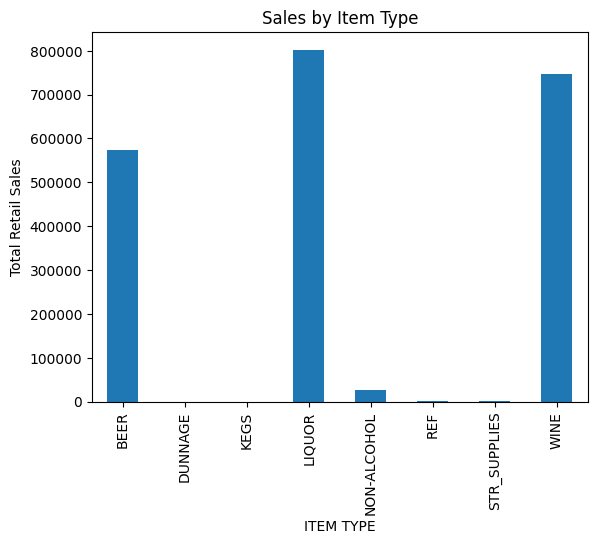

In [38]:
new.groupby('ITEM TYPE')['RETAIL SALES'].sum().plot(kind='bar')
plt.title("Sales by Item Type")
plt.ylabel("Total Retail Sales")
plt.show()

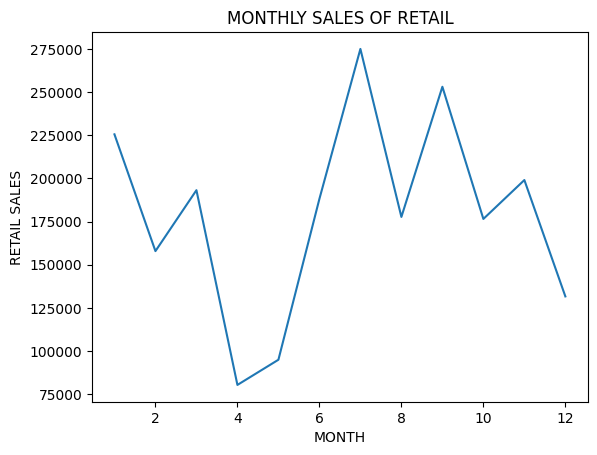

In [39]:
monthly_sales.plot(kind='line')
plt.title('MONTHLY SALES OF RETAIL')
plt.xlabel('MONTH')
plt.ylabel('RETAIL SALES')
plt.show()

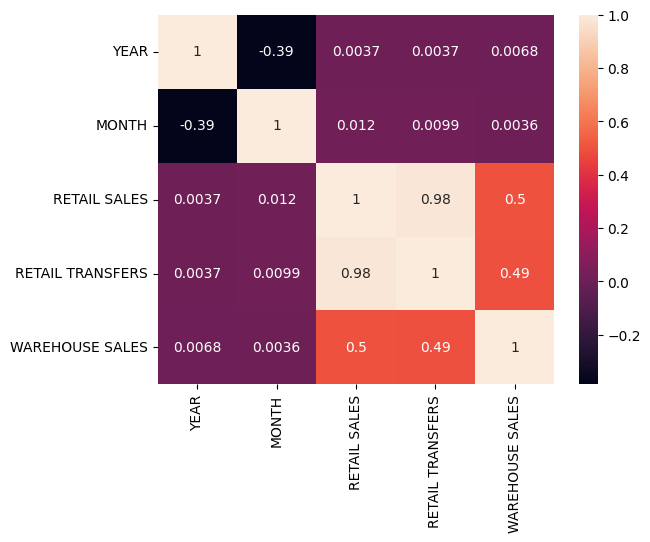

In [40]:
#heatmap
sns.heatmap(new.select_dtypes(include=np.number).corr(), annot=True)
plt.show()